In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("D:\\DATA SCIENCE AND MACHINE LEARNING\\UNZIP_FOR_NOTEBOOKS_FINAL\\DATA\\sonar.all-data.csv")
df.head()

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60,Label
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


### Data Exploration

C:\Users\abmou\AppData\Local\Temp\ipykernel_81348\2083216526.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<AxesSubplot: >

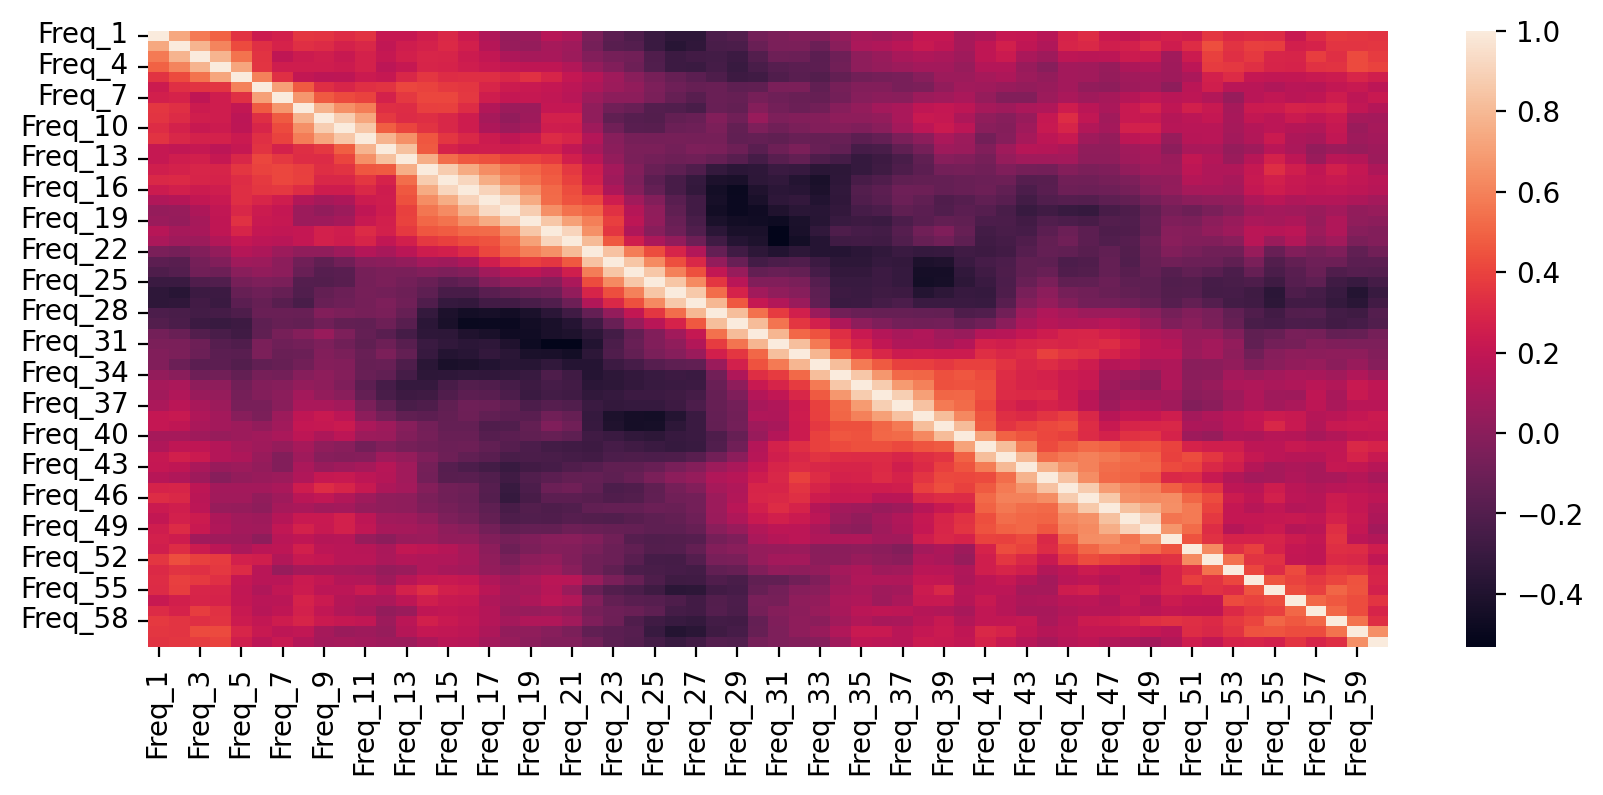

In [6]:
plt.figure(figsize=(10,4),dpi=200)
sns.heatmap(df.corr())

In [7]:
df['Target'] = df['Label'].map({'R':0,'M':1})

In [8]:
np.abs(df.corr()['Target']).sort_values(ascending=False).iloc[:6]

C:\Users\abmou\AppData\Local\Temp\ipykernel_81348\1229070349.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  np.abs(df.corr()['Target']).sort_values(ascending=False).iloc[:6]


Target     1.000000
Freq_11    0.432855
Freq_12    0.392245
Freq_49    0.351312
Freq_10    0.341142
Freq_45    0.339406
Name: Target, dtype: float64

### Train | Test Split

In [14]:
from sklearn.model_selection import train_test_split
x=df.drop(['Target','Label'],axis=1)
y=df['Label']

In [15]:
x_cv, x_test, y_cv, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

In [17]:
scaler=StandardScaler()
knn=KNeighborsClassifier()
operations=[('scaler',scaler),('knn',knn)]
pipe=Pipeline(operations)

In [18]:
k_values=list(range(1,20))
from sklearn.model_selection import GridSearchCV
param_grid={'knn__n_neighbors':k_values}
cv_model=GridSearchCV(pipe,param_grid,cv=5,scoring='accuracy')

In [19]:
cv_model.fit(x_cv,y_cv)

C:\Users\abmou\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\abmou\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [20]:
cv_model.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=1))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=1),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 1,
 'knn__p': 2,
 'knn__weights': 'uniform'}

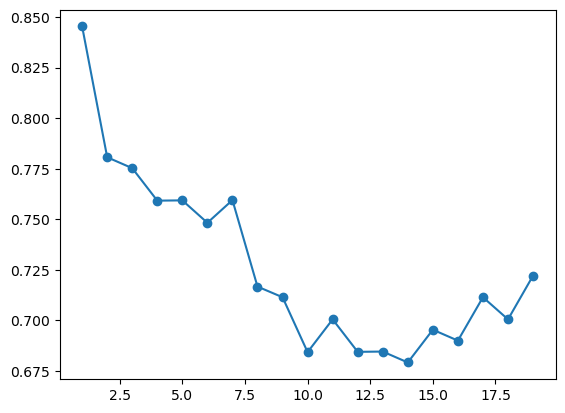

In [21]:
plt.plot(k_values,cv_model.cv_results_['mean_test_score'],'o-')

### Final Model Evaluation

In [38]:
y_pred=cv_model.predict(x_test)

C:\Users\abmou\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [39]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [40]:
confusion_matrix(y_test,y_pred)

array([[12,  1],
       [ 1,  7]], dtype=int64)

In [41]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           M       0.92      0.92      0.92        13
           R       0.88      0.88      0.88         8

    accuracy                           0.90        21
   macro avg       0.90      0.90      0.90        21
weighted avg       0.90      0.90      0.90        21



### SVM

In [42]:
scaled_x_train=scaler.fit_transform(x_cv)
scaled_x_test=scaler.transform(x_test)

In [43]:
from sklearn.svm import SVC

In [44]:
svc = SVC(class_weight='balanced')

In [45]:
from sklearn.model_selection import GridSearchCV

In [46]:
param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1],'gamma': ['scale', 'auto']}
model=GridSearchCV(svc,param_grid)
model

GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1],
                         'gamma': ['scale', 'auto']})

In [47]:
model.fit(scaled_x_train,y_cv)
model.best_params_

{'C': 1, 'gamma': 'auto'}

In [48]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [49]:
y_pred2=model.predict(scaled_x_test)

In [50]:
confusion_matrix(y_test,y_pred2)

array([[11,  2],
       [ 0,  8]], dtype=int64)

In [51]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           M       1.00      0.85      0.92        13
           R       0.80      1.00      0.89         8

    accuracy                           0.90        21
   macro avg       0.90      0.92      0.90        21
weighted avg       0.92      0.90      0.91        21



### Random forest

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
model = RandomForestClassifier(n_estimators=10,max_features='auto',random_state=101)

In [54]:
model.fit(x_cv,y_cv)

RandomForestClassifier(n_estimators=10, random_state=101)

In [59]:
preds3 = model.predict(x_test)

In [60]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix,accuracy_score

In [61]:
confusion_matrix(y_test,preds3)

array([[12,  1],
       [ 1,  7]], dtype=int64)

In [64]:
print(classification_report(y_test,preds3))

              precision    recall  f1-score   support

           M       0.92      0.92      0.92        13
           R       0.88      0.88      0.88         8

    accuracy                           0.90        21
   macro avg       0.90      0.90      0.90        21
weighted avg       0.90      0.90      0.90        21

